# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Import-packages" data-toc-modified-id="Import-packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import packages</a></div><div class="lev1 toc-item"><a href="#SPGL1-example-in-Python" data-toc-modified-id="SPGL1-example-in-Python-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>SPGL1 example in Python</a></div><div class="lev1 toc-item"><a href="#Proximal-Denoising:-Optimal-sigma" data-toc-modified-id="Proximal-Denoising:-Optimal-sigma-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Proximal Denoising: Optimal <code>sigma</code></a></div><div class="lev1 toc-item"><a href="#Compressed-Sensing:-optimal-sigma" data-toc-modified-id="Compressed-Sensing:-optimal-sigma-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Compressed Sensing: optimal <code>sigma</code></a></div>

$
\newcommand{\reals}{\mathbb R}
$

# Import packages

In [85]:
import spgl1

In [86]:
import numpy as np

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

# SPGL1 example in Python

Contrive a linear model.

In [88]:
m = 100  # of rows
N = 10000  # of columns
s = 4  # of non-zeros

In [89]:
A = np.random.randn(m, N)  # measurement matrix

In [90]:
x = np.array([1e6 for _ in range(s)] + [0 for _ in range(N-s)])  # s-sparse vector

In [91]:
eta = .1  # standard deviation of noise
z = np.random.randn(m)  # noise vector

In [92]:
y = np.dot(A, x) + eta*z

We can pass particular parameters to `spgl1` if we so desire. This is the function to do it; see its documentation for further details. The default parameters can be found in the output below.

In [43]:
spgParms = spgl1.spgSetParms({});

 Default parameters for l1Set.m:
        fid : [ positive integer        |     1 ]
  verbosity : [ integer: 1, 2, or 3     |     3 ]
 iterations : [ positive integer        |  10*m ]
  nPrevVals : [ positive integer        |    10 ]
      bpTol : [ positive scalar         | 1e-06 ]
      lsTol : [ positive scalar         | 1e-06 ]
     optTol : [ positive scalar         | 1e-04 ]
     decTol : [ positive scalar         | 1e-04 ]
    stepMin : [ positive scalar         | 1e-16 ]
    stepMax : [ positive scalar         | 1e+05 ]
 rootMethod : [ 1=linear, 2=quadratic   |     2 ]
activeSetIt : [ positive integer        |   Inf ]
subspaceMin : [ 0=no, 1=yes             |     0 ]
  iscomplex : [ 0=no, 1=yes, NaN=auto   |   NaN ]
  maxMatvec : [ positive integer        |   Inf ]
    weights : [ vector                  |     1 ]
    project : [ projection function     |    @()]
primal_norm : [ primal norm eval fun    |    @()]
  dual_norm : [ dual norm eval fun      |    @()]



In [117]:
xstar, residual, gradient, info = spgl1.spgl1(A, y, sigma=eta)

|x* - x|_2 = 0.112


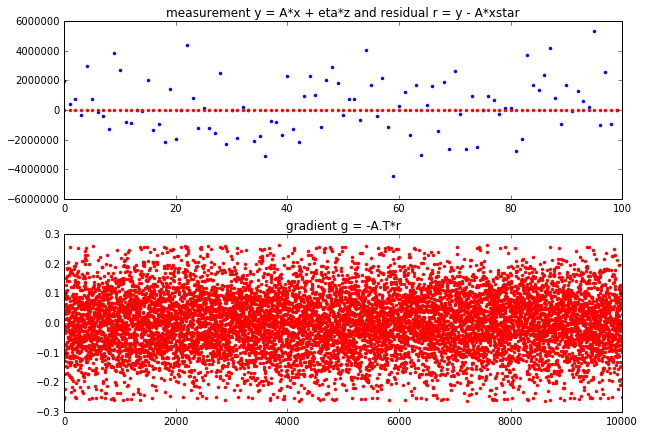

In [119]:
print('|x* - x|_2 = %5.3g' % np.linalg.norm(xstar-x, 2))
plt.figure(figsize=(10,7))
plt.subplot(211)
plt.plot(y, 'b.');
plt.hold(True)
plt.plot(residual, 'r.');
plt.title('measurement y = A*x + eta*z and residual r = y - A*xstar')
plt.subplot(212)
plt.plot(gradient, 'r.');
plt.title('gradient g = -A.T*r');

In [120]:
info

{'gNorm': 0.2646640958627699,
 'iterr': 213,
 'itnLSQR': 0,
 'lambdaa': array([  1.19809742e+08,   7.26652988e+07,   6.96073022e+07,
          4.58346939e+07,   3.67064719e+07,   3.66126554e+07,
          3.35629646e+07,   2.99969838e+07,   2.78369389e+07,
          2.57584153e+07,   3.80827829e+07,   3.48264493e+07,
          2.30849345e+07,   2.23321499e+07,   2.22274116e+07,
          8.03252543e+06,   7.69980643e+06,   6.52731311e+06,
          6.12662806e+06,   5.82967895e+06,   4.46978375e+06,
          4.37408250e+06,   5.36474603e+06,   3.91134071e+06,
          3.53367518e+06,   3.44031748e+06,   2.83731826e+06,
          2.68643310e+06,   4.27557441e+06,   2.64282977e+06,
          2.41865039e+06,   2.20221403e+06,   2.12882488e+06,
          1.74261741e+06,   2.00779264e+06,   3.15310450e+06,
          1.79185582e+06,   1.43490826e+06,   1.24968796e+06,
          1.17671122e+06,   9.95650438e+05,   1.62745841e+06,
          1.14456759e+06,   8.76518898e+05,   7.75100369e+05,

# Proximal Denoising: Optimal `sigma`

In this section we're going to be trying to generate instability in the problem to try to get something that mirrors the theoretical results we have. 

In [130]:
N = 10000
m = N
s = 3
x = np.array([1e6 for _ in range(s)] + [0 for _ in range(N-s)])
z = np.random.randn(m)
eta = .1
y = x + eta*z

We know that the solution to the problem is given by soft thresholding. We'll be looking to say something about the vectors $q, \bar q \in \reals^N$ that were defined in the document I'm currently working on. 

# Compressed Sensing: optimal `sigma`

This function is basically a fancy kind of transpose for un-nesting and re-nesting a list of lists.

In [50]:
def unzip(tuples):
    return zip(*tuples)

Define the vector of thresholds to use.

In [68]:
sigma_vec = np.logspace(-1, 0.5, 101).tolist()

Create a series of models using each of the threshold values defined above.

In [69]:
spgl1_models = [spgl1.spgl1(A, y, sigma=sigma) for sigma in sigma_vec]

Create the vector of $x^*$'s, residuals, gradients and info's that are returned by each call to `spgl1`.

In [70]:
xstar, residual, gradient, info = unzip(spgl1_models)

Compute the mean-squared error between the true `x` and the recovered one. 

In [94]:
mse = np.array([np.linalg.norm(x-xs,2) for xs in xstar])

Plot the result as a function of `sigma`.

In [108]:
np.array(sigma_vec)[(mse < ymax).T]

array([ 0.1       ,  0.10351422,  0.10715193,  0.11091748,  0.11481536,
        0.11885022,  0.12302688,  0.12735031,  0.13182567,  0.13645831,
        0.14125375,  0.14621772,  0.15135612,  0.15667511,  0.16218101,
        0.1678804 ,  0.17378008,  0.17988709,  0.18620871,  0.19275249,
        0.19952623,  0.20653802,  0.21379621,  0.22130947,  0.22908677,
        0.23713737,  0.24547089,  0.25409727,  0.2630268 ,  0.27227013,
        0.28183829,  0.2917427 ,  0.30199517,  0.31260794,  0.32359366,
        0.33496544,  0.34673685,  0.35892193,  0.37153523,  0.38459178,
        0.39810717,  0.41209752,  0.42657952,  0.44157045,  0.45708819,
        0.47315126,  0.48977882,  0.50699071,  0.52480746,  0.54325033,
        0.56234133,  0.58210322,  0.60255959,  0.62373484,  0.64565423,
        0.66834392,  0.69183097,  0.71614341,  0.74131024,  0.76736149,
        0.79432823,  0.82224265,  0.85113804,  0.88104887,  0.91201084,
        0.94406088,  0.97723722,  1.01157945,  1.04712855,  1.08

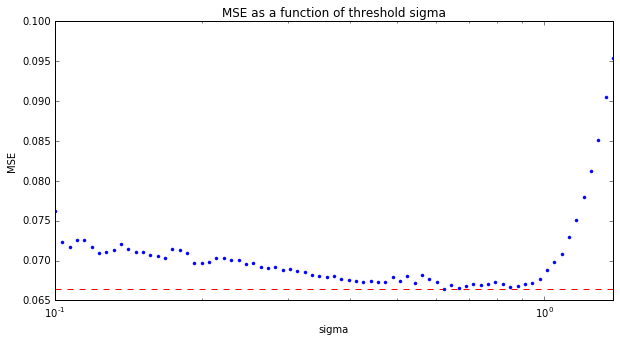

In [123]:
ymax = .1
ymin = min(mse)
ymin = ymin - (ymax-ymin)*.1
sigma2 = np.array(sigma_vec)[mse < ymax]
mse2 = mse[mse < ymax]
plt.figure(figsize=(10,5))
plt.plot(sigma2, mse2, 'b.')
plt.xscale('log')
plt.hlines(min(mse), sigma2[0], sigma2[-1], colors='r', linestyles='dashed')
plt.xlim(sigma2[0], sigma2[-1]);
plt.xlabel('sigma')
plt.ylabel('MSE')
plt.title('MSE as a function of threshold sigma');